In [55]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import trompy as tp

import dill

rcParams['font.family'] = 'Arial'
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.transparent'] = True
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]
custom_cmap = LinearSegmentedColormap.from_list("custom_diverging", [colors[1], "white", colors[3]])

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")

In [56]:
with open(DATAFOLDER / "behav_data.pickle", "rb") as f:
    data = dill.load(f)

x_array = data["x_vel"]
#snips_photo = data["snips_photo"]
snips_vel = data["snips_vel"]
snips_still = data["snips_still"]

(49, 200)
(49, 200)
(49, 200)
(49, 200)
(49, 200)
(49, 200)
(49, 200)
(49, 200)
(49, 200)
(49, 200)


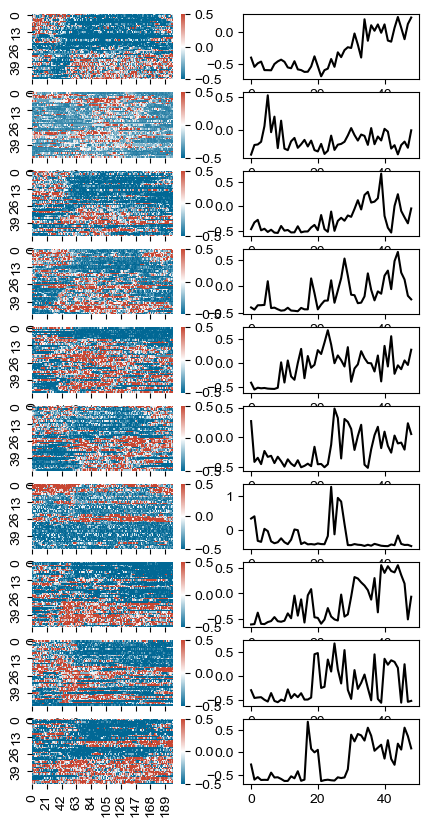

In [60]:
query_string = "condition == 'deplete' & infusiontype == '45NaCl'"

rats = x_array.query(query_string).id.unique()

f, ax = plt.subplots(nrows=len(rats), ncols=2, figsize=(5, len(rats)))

for i, rat in enumerate(rats):
    query_string = f"condition == 'deplete' & infusiontype == '45NaCl' & id == '{rat}'"
    snips_tmp = snips_still[x_array.query(query_string).index]
    print(snips_tmp.shape)
    
    sns.heatmap(snips_tmp,
                vmin=-0.5,
                vmax=0.5,
                ax=ax[i, 0],
                cmap=custom_cmap,)
    
    ax[i, 1].plot(np.nanmedian(snips_tmp[:,50:150], axis=1), color='k')


In [33]:
np.mean(snips_tmp[:,50:150], axis=1).shape

(49,)